In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/classificacao_multiclasse/main/Dados/dados_estudantes.csv')
data

,Estado civil,Migração,Sexo,Idade na matrícula,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Taxa de desemprego,...,disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações),Target
0,Solteiro,Sim,Masculino,20,Não,Não,Não,Sim,Não,10.8,...,0,0.000000,0,0,0,0,0,0.000000,0,Desistente
1,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,13.9,...,6,14.000000,0,0,6,6,6,13.666667,0,Graduado
2,Solteiro,Sim,Masculino,19,Não,Não,Não,Não,Não,10.8,...,0,0.000000,0,0,6,0,0,0.000000,0,Desistente
3,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Não,9.4,...,6,13.428571,0,0,6,10,5,12.400000,0,Graduado
4,Casado,Não,Feminino,45,Não,Não,Não,Sim,Não,13.9,...,5,12.333333,0,0,6,6,6,13.000000,0,Graduado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Solteiro,Não,Masculino,19,Não,Não,Não,Sim,Não,15.5,...,5,13.600000,0,0,6,8,5,12.666667,0,Graduado
4420,Solteiro,Sim,Feminino,18,Sim,Não,Sim,Não,Não,11.1,...,6,12.000000,0,0,6,6,2,11.000000,0,Desistente
4421,Solteiro,Sim,Feminino,30,Não,Não,Não,Sim,Sim,13.9,...,7,14.912500,0,0,8,9,1,13.500000,0,Desistente
4422,Solteiro,Sim,Feminino,20,Não,Não,Não,Sim,Sim,9.4,...,5,13.800000,0,0,5,6,5,12.000000,0,Graduado


# Conhecendo os dados

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [4]:
colunas_categoricas = ['Estado civil', 'Migração', 'Sexo', 'Estrangeiro', 'Necessidades educacionais especiais', 'Devedor', 'Taxas de matrícula em dia', 'Bolsista', 'Curso', 'Período', 'Qualificação prévia', 'Target']
data[colunas_categoricas].describe()

,Estado civil,Migração,Sexo,Estrangeiro,Necessidades educacionais especiais,Devedor,Taxas de matrícula em dia,Bolsista,Curso,Período,Qualificação prévia,Target
count,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424,4424
unique,6,2,2,2,2,2,2,2,17,2,17,3
top,Solteiro,Sim,Feminino,Não,Não,Não,Sim,Não,Enfermagem,Diurno,Educação secundária,Graduado
freq,3919,2426,2868,4314,4373,3921,3896,3325,766,3941,3717,2209


In [5]:
data['Target'].value_counts()

Target
Graduado       2209
Desistente     1421
Matriculado     794
Name: count, dtype: int64

In [6]:
data.describe()

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),disciplinas 2º semestre (creditadas),disciplinas 2º semestre (matriculadas),disciplinas 2º semestre (avaliações),disciplinas 2º semestre (aprovadas),disciplinas 2º semestre (notas),disciplinas 2º semestre (sem avaliações)
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,23.265145,11.566139,1.228029,0.001969,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316
std,7.587816,2.663850,1.382711,2.269935,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774
min,17.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,9.400000,0.300000,-1.700000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000
50%,20.000000,11.100000,1.400000,0.320000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000
75%,25.000000,13.900000,2.600000,1.790000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000
max,70.000000,16.200000,3.700000,3.510000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000


# Explorando os dados

In [7]:
data['Estado civil'].value_counts(normalize=True) * 100

Estado civil
Solteiro               88.584991
Casado                  8.566908
Divorciado              2.056962
União Estável           0.565099
Legalmente Separado     0.135624
Viúvo                   0.090416
Name: proportion, dtype: float64

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

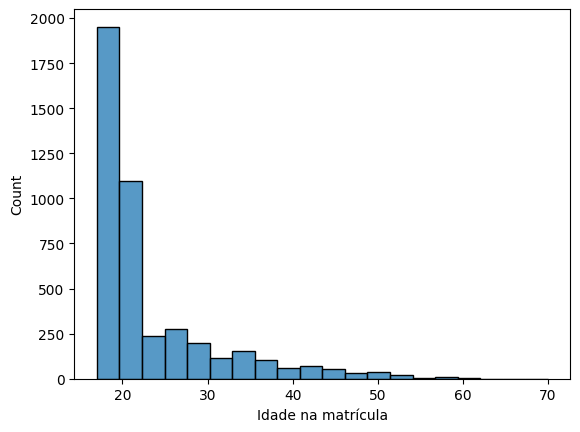

In [9]:
sns.histplot(data['Idade na matrícula'], bins=20)
plt.show()

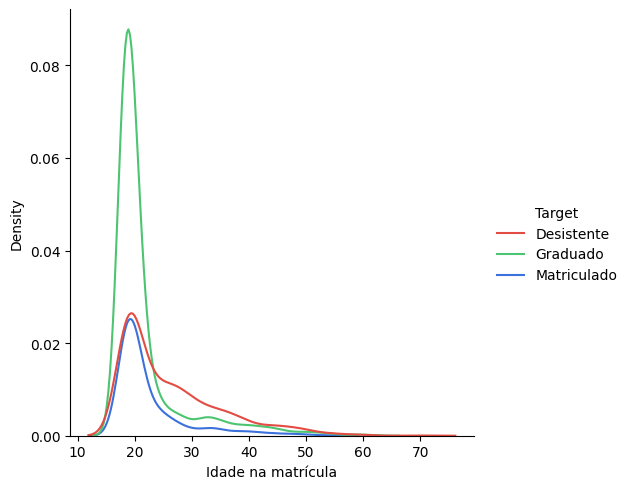

In [10]:
color_dict = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'}
sns.set_palette(list(color_dict.values()))
sns.displot(data, x='Idade na matrícula', hue='Target', kind='kde')
plt.show()

In [11]:
list(color_dict.values())

['#e34c42', '#4dc471', '#3b71db']

In [12]:
data['Estrangeiro'].value_counts(normalize=True) * 100

Estrangeiro
Não    97.513562
Sim     2.486438
Name: proportion, dtype: float64

In [13]:
data['Sexo'].value_counts(normalize=True) * 100

Sexo
Feminino     64.82821
Masculino    35.17179
Name: proportion, dtype: float64

<Axes: xlabel='Sexo', ylabel='count'>

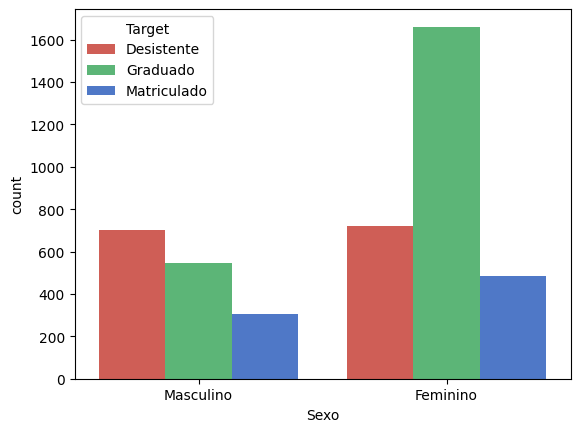

In [14]:
sns.countplot(data, x='Sexo', hue='Target')

<Axes: xlabel='Devedor', ylabel='count'>

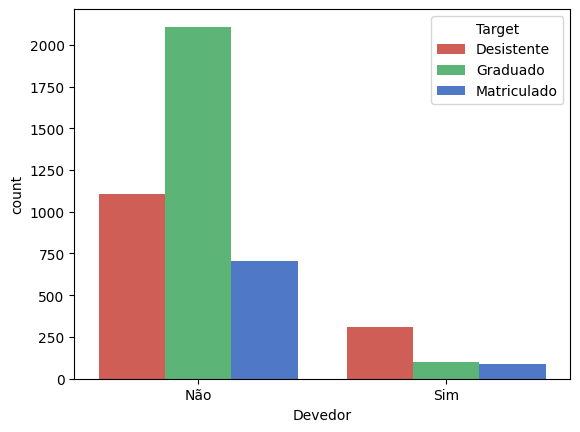

In [15]:
sns.countplot(data, x='Devedor', hue='Target')

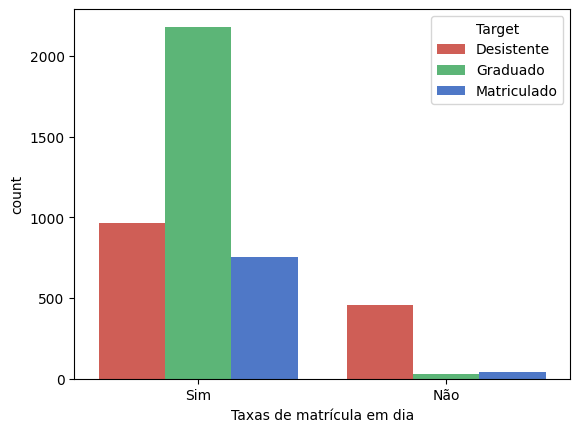

In [16]:
sns.countplot(data, x='Taxas de matrícula em dia', hue='Target');

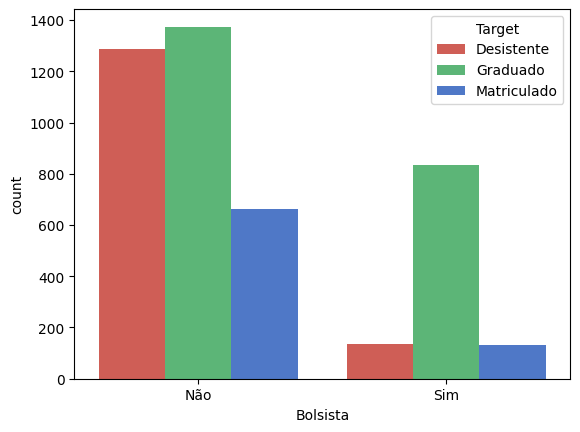

In [17]:
sns.countplot(data, x='Bolsista', hue='Target');

In [18]:
import plotly.express as px

In [19]:
contagem = data.groupby(['Curso', 'Target']).size().reset_index(name='Contagem')
contagem

,Curso,Target,Contagem
0,Agronomia,Desistente,86
1,Agronomia,Graduado,87
2,Agronomia,Matriculado,37
3,Animação e Design Multimídia,Desistente,82
4,Animação e Design Multimídia,Graduado,96
5,Animação e Design Multimídia,Matriculado,37
6,Design de Comunicação,Desistente,51
7,Design de Comunicação,Graduado,133
8,Design de Comunicação,Matriculado,42
9,Educação Básica,Desistente,85


In [20]:
sum(contagem['Contagem'])

4424

In [21]:
contagem['Porcentagem'] = contagem.groupby('Curso')['Contagem'].transform(lambda x: (x / x.sum()) * 100)

In [22]:
contagem

,Curso,Target,Contagem,Porcentagem
0,Agronomia,Desistente,86,40.952381
1,Agronomia,Graduado,87,41.428571
2,Agronomia,Matriculado,37,17.619048
3,Animação e Design Multimídia,Desistente,82,38.139535
4,Animação e Design Multimídia,Graduado,96,44.651163
5,Animação e Design Multimídia,Matriculado,37,17.209302
6,Design de Comunicação,Desistente,51,22.566372
7,Design de Comunicação,Graduado,133,58.849558
8,Design de Comunicação,Matriculado,42,18.584071
9,Educação Básica,Desistente,85,44.270833


In [23]:
fig = px.bar(contagem, x='Porcentagem', y='Curso', color='Target', orientation='h',
             color_discrete_map = {'Desistente': '#e34c42', 'Graduado': '#4dc471', 'Matriculado': '#3b71db'})
fig.show()

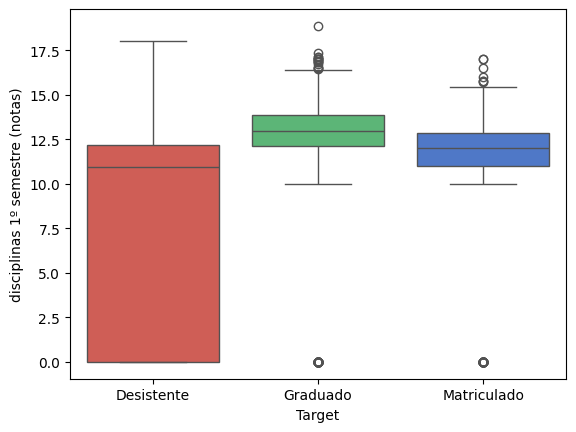

In [24]:
sns.boxplot(data, x='Target', y='disciplinas 1º semestre (notas)', hue='Target');

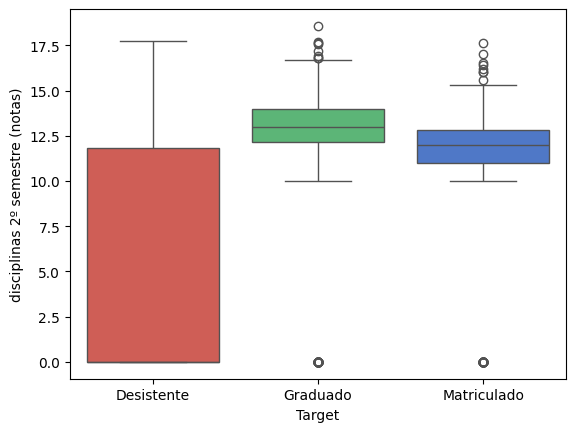

In [25]:
sns.boxplot(data, x='Target', y='disciplinas 2º semestre (notas)', hue='Target');

In [26]:
data['Target'].value_counts(normalize=True) * 100

Target
Graduado       49.932188
Desistente     32.120253
Matriculado    17.947559
Name: proportion, dtype: float64

# Realizando o treinamento

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 28 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Estado civil                              4424 non-null   object 
 1   Migração                                  4424 non-null   object 
 2   Sexo                                      4424 non-null   object 
 3   Idade na matrícula                        4424 non-null   int64  
 4   Estrangeiro                               4424 non-null   object 
 5   Necessidades educacionais especiais       4424 non-null   object 
 6   Devedor                                   4424 non-null   object 
 7   Taxas de matrícula em dia                 4424 non-null   object 
 8   Bolsista                                  4424 non-null   object 
 9   Taxa de desemprego                        4424 non-null   float64
 10  Taxa de inflação                    

In [28]:
data['Curso'].dtype == 'O'

True

In [29]:
colunas_categoricas = []
for coluna in data.columns:
    if data[coluna].dtype == 'O':
        colunas_categoricas.append(coluna)
        
colunas_categoricas.pop()
colunas_categoricas

['Estado civil',
 'Migração',
 'Sexo',
 'Estrangeiro',
 'Necessidades educacionais especiais',
 'Devedor',
 'Taxas de matrícula em dia',
 'Bolsista',
 'Curso',
 'Período',
 'Qualificação prévia']

In [30]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='if_binary')

In [31]:
df_enconded = pd.DataFrame(encoder.fit_transform(data[colunas_categoricas]).toarray(),
                             columns=encoder.get_feature_names_out(colunas_categoricas))
df_enconded

,Estado civil_Casado,Estado civil_Divorciado,Estado civil_Legalmente Separado,Estado civil_Solteiro,Estado civil_União Estável,Estado civil_Viúvo,Migração_Sim,Sexo_Masculino,Estrangeiro_Sim,Necessidades educacionais especiais_Sim,...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df_not_encoded = data.drop(columns=colunas_categoricas)
df_1_all_binary = pd.concat([df_not_encoded, df_enconded], axis=1)
df_1_all_binary

,Idade na matrícula,Taxa de desemprego,Taxa de inflação,PIB,disciplinas 1º semestre (creditadas),disciplinas 1º semestre (matriculadas),disciplinas 1º semestre (avaliações),disciplinas 1º semestre (aprovadas),disciplinas 1º semestre (notas),disciplinas 1º semestre (sem avaliações),...,Qualificação prévia_Educação básica 3º ciclo (9º/10º/11º ano) ou equivalente,Qualificação prévia_Educação secundária,Qualificação prévia_Educação superior - bacharelado,Qualificação prévia_Educação superior - doutorado,Qualificação prévia_Educação superior - licenciatura,Qualificação prévia_Educação superior - licenciatura (1º ciclo),Qualificação prévia_Educação superior - mestrado,Qualificação prévia_Educação superior - mestrado (2º ciclo),Qualificação prévia_Frequência de educação superior,Qualificação prévia_Outro - 11º ano de escolaridade
0,20,10.8,1.4,1.74,0,0,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19,13.9,-0.3,0.79,0,6,6,6,14.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,19,10.8,1.4,1.74,0,6,0,0,0.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20,9.4,-0.8,-3.12,0,6,8,6,13.428571,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,45,13.9,-0.3,0.79,0,6,9,5,12.333333,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,19,15.5,2.8,-4.06,0,6,7,5,13.600000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4420,18,11.1,0.6,2.02,0,6,6,6,12.000000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4421,30,13.9,-0.3,0.79,0,7,8,7,14.912500,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4422,20,9.4,-0.8,-3.12,0,5,5,5,13.800000,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Exportando o dataframe para facilitar os futuros carregamentos

In [33]:
df_1_all_binary.to_csv('df_tratado.csv', index=False)

NameError: name 'sns' is not defined